In [136]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [137]:
%matplotlib notebook

In [138]:
%matplotlib inline

In [139]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# import os

# Read file and store as a DataFrame
public_arrest_data_to_load = pd.read_csv("Resources/PublicReleaseArrestDataUPDATE.csv")
crimes_2015_present_to_load = pd.read_csv("Resources/Crimes_2015toPresent.csv")
fatalities_data_to_load = pd.read_csv("Resources/Fatal_complete.csv")

public_arrest_data = pd.DataFrame(public_arrest_data_to_load)
# public_arrest_data.head()
crimes_2015_present = pd.DataFrame(crimes_2015_present_to_load)
# crimes_2015_present.head()
fatalities_data = pd.DataFrame(fatalities_data_to_load)
# fatalities_data.head()


# merge datasets 
# crime_data_complete = pd.merge(fatalities_shoot_data, , how="left", on=["Date"])
# crime_data_complete
# crime_data_complete.to_csv("Crime_data_complete")


In [140]:
#visualizing all datasets
public_arrest_data.head(2)

,ARR_DISTRICT,ARR_BEAT,ARR_YEAR,ARR_MONTH,RACE_CODE_CD,FBI_CODE,STATUTE,STAT_DESCR,CHARGE_CLASS_CD,CHARGE_TYPE_CD
0,10.0,1033.0,2017,8,BLK,18,720 ILCS 570.0/407-B-1,MFG/DEL COCAINE/SCH/PUB HS/PK,X,F
1,9.0,923.0,2017,8,WWH,WRT,725 ILCS 225.0/13,FUGITIVE FROM JUSTICE - OUT OF STATE WARRANT,Z,NaN


In [141]:
#vizualizing all datasets
crimes_2015_present.head(2)

,District,Primary Type,Arrest,Date,IUCR,Description,Location Description,FBI Code,Year,Latitude,Longitude
0,1.0,ARSON,True,10/26/2015 07:06:00 PM,1090,ATTEMPT ARSON,CONSTRUCTION SITE,09,2015,41.885874,-87.625284
1,6.0,WEAPONS VIOLATION,True,10/09/2018 11:22:00 PM,143A,UNLAWFUL POSS OF HANDGUN,STREET,15,2018,41.750717,-87.638868


In [174]:
#visualizing all datasets
fatalities_data.head(2)

,Date,Year,Name,Age,Gender,Race,Location of injury (address),Location of death (city),State,Location of death (zip code),Location of death (county),Full Address,Latitude,Longitude,location_precision,name,age,gender,race,body_camera
0,2/4/2015,2015,Kevin D. Garrett,60.0,Male,African-American/Black,2800 block East 79th Street,Chicago,IL,60649,Cook,2800 block East 79th Street Chicago IL 60649 Cook,41.752070,-87.556710,NaN,NaN,NaN,NaN,NaN,NaN
1,4/17/2015,2015,Jeffery Kemp,18.0,Male,African-American/Black,74th Street and Merrill Avenue,Chicago,IL,60649,Cook,74th Street and Merrill Avenue Chicago IL 6064...,41.760724,-87.572476,not_available,Jeffrey Kemp,18.0,male,B,False


## Crime Summary
- Exploratory calculations to become familiar with and collect dataset highlights using the crimes_2015_present dataset
---------------------------------------------------------

In [175]:
# Calculate the total number of unique crime events that happened from 2015 to present (2023)
total_crimes_count = crimes_2015_present.count()["Date"]
total_crimes_count

print(f"There have been a total of {total_crimes_count} crimes registered in Chicago from 2015 to the present.")

There have been a total of 532753 crimes registered in Chicago from 2015 to the present.


In [176]:
# Select all of the different crime description types
crime_primary_types = crimes_2015_present["Primary Type"].value_counts()
crime_primary_types.head()

THEFT              133938
BATTERY             88872
NARCOTICS           57647
CRIMINAL DAMAGE     37204
OTHER OFFENSE       35391
Name: Primary Type, dtype: int64

In [177]:
# Select all of the different Location description types
location_description_types = crimes_2015_present["Location Description"].value_counts()
location_description_types.head(10)

STREET                            125128
RESIDENCE                          65914
APARTMENT                          59620
SIDEWALK                           55908
OTHER                              19720
PARKING LOT/GARAGE(NON.RESID.)     15800
SMALL RETAIL STORE                 15200
RESTAURANT                         13223
DEPARTMENT STORE                   12865
ALLEY                              12622
Name: Location Description, dtype: int64

In [178]:
# Select all of the different Districts
districts = crimes_2015_present["District"].value_counts()
districts.head(50)

25.0    57332
12.0    54080
19.0    48723
18.0    43753
11.0    42273
15.0    41019
14.0    39289
24.0    23799
22.0    20444
20.0    18515
16.0    16500
6.0     15806
7.0     15426
10.0    14743
4.0     13049
5.0     11768
8.0     11684
1.0     10254
9.0     10096
3.0      9806
2.0      7247
17.0     7120
31.0       27
Name: District, dtype: int64

In [179]:
# Select all of the different FBI Codes
FBI_codes = crimes_2015_present["FBI Code"].value_counts()
FBI_codes.head(4)

06     133938
08B     76972
18      57460
26      55618
Name: FBI Code, dtype: int64

In [180]:
# Calaculate the top crimes committed per district
crimes_2015_present["District"]

0          1.0
1          6.0
2          6.0
3          6.0
4          6.0
          ... 
532748    16.0
532749    16.0
532750    16.0
532751    16.0
532752    16.0
Name: District, Length: 532753, dtype: float64

## Demographic Summary - Arrest Data
- Collect dataset highlights using public_arrest_data
- Years 2015 - 2017
----------------------------------------------------


In [149]:
# Calculate the total number of unique crime events that took place from 2014-2017 in the public_arrest_data dataset
total_crimes_public_arr_count = public_arrest_data.count()["ARR_YEAR"]
total_crimes_public_arr_count

print(f"There have been a total of {total_crimes_public_arr_count} crimes registered in Chicago from 2014 to 2017, based on Public Release Arrest Dataset.")

There have been a total of 410682 crimes registered in Chicago from 2014 to 2017, based on Public Release Arrest Dataset.


In [150]:
# WHAT IS THE ARREST COUNT PER DISTRICT?
total_arrests_per_distrct = public_arrest_data["ARR_DISTRICT"].value_counts()
total_arrests_per_distrct.head(2)

# WHICH 2 DISTRICTS HAVE THE HIGHEST COUNT OF ARRESTS?
print(f"Districts 11 and 7 have the highest number of arrests in the city of Chicago during 2014-2017.")

Districts 11 and 7 have the highest number of arrests in the city of Chicago during 2014-2017.


In [151]:
# WHICH 2 DISTRICTS HAVE THE LOWEST COUNT OF ARRESTS?
total_arrests_per_distrct = public_arrest_data["ARR_DISTRICT"].value_counts()
total_arrests_per_distrct.tail(2)
print(f"Districts 17 and 20 have the lowest number of arrests in the city of Chicago during 2014-2017.")

Districts 17 and 20 have the lowest number of arrests in the city of Chicago during 2014-2017.


In [152]:
# WHAT IS THE TOTAL ARREST COUNT, PER RACE?
total_arrests_per_race = public_arrest_data[public_arrest_data['RACE_CODE_CD'].notnull() ].groupby('ARR_YEAR').size()
total_arrests_per_race


ARR_YEAR
2014    128603
2015    112574
2016     85805
2017     83700
dtype: int64

In [153]:
#count the number of arrests by race
total_arrests_by_race = public_arrest_data.groupby('RACE_CODE_CD').size()
total_arrests_by_race

RACE_CODE_CD
API      2375
BLK    298318
I         293
U         635
WBH      2417
WHI     34647
WWH     71997
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

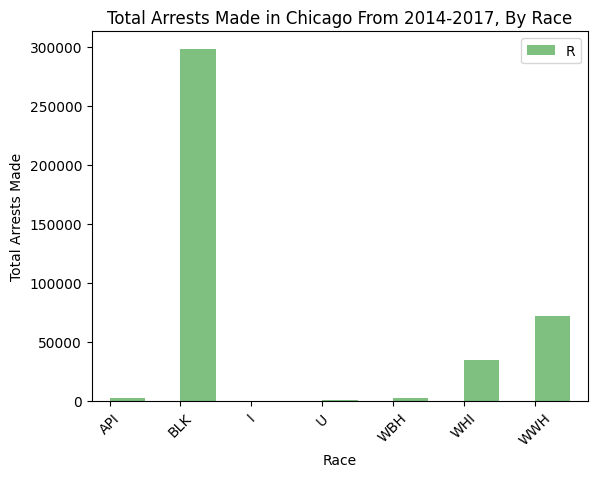

In [154]:
#plot the number of arrests by race
total_arrests_by_race.plot(kind='bar', color= 'g', alpha=0.5, align="edge")
plt.xticks(rotation=45)
plt.xlabel("Race")
plt.ylabel("Total Arrests Made")
plt.legend('Race Group', loc='best')
plt.title("Total Arrests Made in Chicago From 2014-2017, By Race")
plt.show

## Demographic Summary - Fatalities Data
- Collect dataset highlights using fatalities_data
- Years 2015-2023
---------------------------------------------------------------------

In [155]:
# Calculate the total number of unique shooting fatality events that took place from 2015 to present (2023) in the fatalities_shoot_data
total_fatalities = fatalities_data.count()["Date"]
total_fatalities


115

In [156]:
print(f"There have been a total of {total_fatalities} shooting fatalities registered in the city of Chicago from 2015 to the present, based on Fatalities Dataset.")

There have been a total of 115 shooting fatalities registered in the city of Chicago from 2015 to the present, based on Fatalities Dataset.


In [157]:
# WHAT IS THE ARREST COUNT PER ZIP CODE?
total_fatalities_per_zip = fatalities_data["Location of death (zip code)"].value_counts()
total_fatalities_per_zip.head()


60628    10
60624     8
60623     8
60644     7
60636     7
Name: Location of death (zip code), dtype: int64

In [158]:
# WHICH 5 ZIP CODES HAVE THE HIGHEST COUNT OF ARRESTS?
print(f"Zip codes 60628, 60624, 60623, 60644, and 60636 have the highest number of arrests in the city of Chicago during 2015-2021 based on Fatalities Dataset.")

Zip codes 60628, 60624, 60623, 60644, and 60636 have the highest number of arrests in the city of Chicago during 2015-2021 based on Fatalities Dataset.


## Demographics Summary - Yearly Fatalities by Race

In [159]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# African-American/Black
total_AA_fatalities_year = fatalities_data[fatalities_data['Race'] == 'African-American/Black'].groupby('Year').size()
total_AA_fatalities_year

Year
2015    14
2016    13
2017    11
2018    10
2019    12
2020     9
2021     6
dtype: int64

In [160]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Asian/Pacific Islander
total_API_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Asian/Pacific Islander'].groupby('Year').size()
total_API_fatalities_year

Year
2020    1
dtype: int64

In [161]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# European-American/White
total_WH_fatalities_year = fatalities_data[fatalities_data['Race'] == 'European-American/White'].groupby('Year').size()
total_WH_fatalities_year

Year
2016    1
2017    1
2018    3
2021    1
dtype: int64

In [162]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Hispanic/Latino
total_HIS_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Hispanic/Latino'].groupby('Year').size()
total_HIS_fatalities_year

Year
2015    3
2017    3
2018    1
2020    5
2021    4
dtype: int64

In [163]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Middle Eastern
total_MIDE_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Middle Eastern'].groupby('Year').size()
total_MIDE_fatalities_year

Year
2019    1
dtype: int64

In [164]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY RACE?
# Race Unspecified
total_UNS_fatalities_year = fatalities_data[fatalities_data['Race'] == 'Race unspecified'].groupby('Year').size()
total_UNS_fatalities_year

Year
2016    2
2017    3
2018    1
2019    3
2020    6
2021    1
dtype: int64

In [165]:
#Create a dataframe containing fatilities per race by year
all_races_fatalities = pd.DataFrame({
    "African-American/Black": total_AA_fatalities_year,
    "Asian/Pacific Islander": total_API_fatalities_year,
    "European-American/White": total_WH_fatalities_year,
    "Hispanic/Latino": total_HIS_fatalities_year,
    "Middle Eastern": total_MIDE_fatalities_year,
    "Race unspecified": total_UNS_fatalities_year
})

all_races_fatalities

,African-American/Black,Asian/Pacific Islander,European-American/White,Hispanic/Latino,Middle Eastern,Race unspecified
Year,,,,,,
2015,14,NaN,NaN,3.0,NaN,NaN
2016,13,NaN,1.0,NaN,NaN,2.0
2017,11,NaN,1.0,3.0,NaN,3.0
2018,10,NaN,3.0,1.0,NaN,1.0
2019,12,NaN,NaN,NaN,1.0,3.0
2020,9,1.0,NaN,5.0,NaN,6.0
2021,6,NaN,1.0,4.0,NaN,1.0


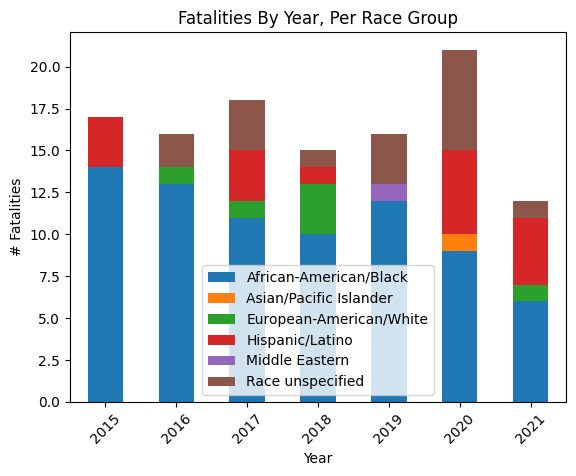

In [166]:
#plot a stacked bar chart uning matplotlib
all_races_fatalities.plot(kind='bar', stacked=True, title='Fatalities By Year, Per Race Group')
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("# Fatalities")
plt.legend(loc = 'best')
# plt.grid()
# plt.savefig("Visualizations/fatalities_year_byrace.png")
plt.show()

## Zip Code - Top Zip Code Fatalities, by Zip
* For Top Fatality Occurence Zip codes 60628, 60624, 60623, 60644, and 60636

In [167]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY ZIP?
# Zip 60628
total_60628_fatalities_year = fatalities_data[fatalities_data['Location of death (zip code)'] == 60628].groupby('Year').size()
total_60628_fatalities_year

Year
2015    1
2016    3
2017    2
2019    2
2020    2
dtype: int64

In [168]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY ZIP?
# Zip 60624
total_60624_fatalities_year = fatalities_data[fatalities_data['Location of death (zip code)'] == 60624].groupby('Year').size()
total_60624_fatalities_year

Year
2015    1
2016    3
2017    3
2020    1
dtype: int64

In [169]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY ZIP?
# Zip 60623
total_60623_fatalities_year = fatalities_data[fatalities_data['Location of death (zip code)'] == 60623].groupby('Year').size()
total_60623_fatalities_year

Year
2017    2
2018    1
2019    2
2020    2
2021    1
dtype: int64

In [170]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY ZIP?
# Zip 60644
total_60644_fatalities_year = fatalities_data[fatalities_data['Location of death (zip code)'] == 60644].groupby('Year').size()
total_60644_fatalities_year

Year
2015    4
2018    2
2021    1
dtype: int64

In [171]:
# WHAT IS THE FATALITY COUNT PER YEAR, BY ZIP?
# Zip 60636
total_60636_fatalities_year = fatalities_data[fatalities_data['Location of death (zip code)'] == 60636].groupby('Year').size()
total_60636_fatalities_year

Year
2016    3
2018    3
2021    1
dtype: int64

In [172]:
#Create a dataframe containing fatilities per zip code by year
all_zip_fatalities = pd.DataFrame({
    "60628": total_60628_fatalities_year, 
    "60624": total_60624_fatalities_year, 
    "60623": total_60623_fatalities_year, 
    "60644": total_60644_fatalities_year,
    "60636": total_60636_fatalities_year
})

all_zip_fatalities

,60628,60624,60623,60644,60636
Year,,,,,
2015,1.0,1.0,NaN,4.0,NaN
2016,3.0,3.0,NaN,NaN,3.0
2017,2.0,3.0,2.0,NaN,NaN
2018,NaN,NaN,1.0,2.0,3.0
2019,2.0,NaN,2.0,NaN,NaN
2020,2.0,1.0,2.0,NaN,NaN
2021,NaN,NaN,1.0,1.0,1.0


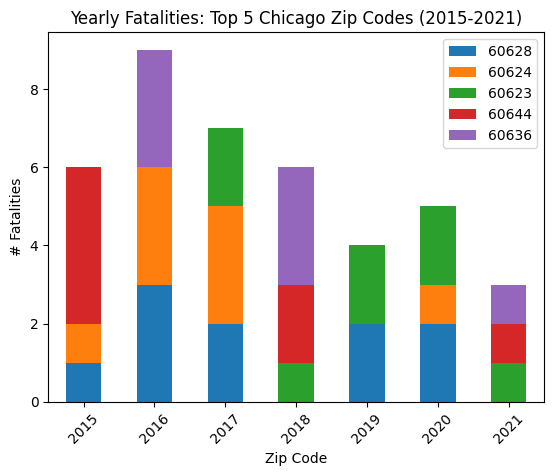

In [173]:
#plot a stacked bar chart using matplotlib
all_zip_fatalities.plot(kind='bar', stacked=True, title='Yearly Fatalities: Top 5 Chicago Zip Codes (2015-2021)')
plt.xlabel("Zip Code")
plt.xticks(rotation= 45)
plt.ylabel("# Fatalities")
plt.legend(loc = 'best')
# plt.grid()
# plt.savefig("Visualizations/fatalities_year_byrace.png")
plt.show()